## Introduction to Convolution Neural Networks.

Apply the convolutions to the earlier problem that classifies the hand written digits from MNIST dataset.
<br>Convolution is the procedure of applying the kernel filters to the images.
<br>In the Convolutional Neural Network we should have atleast on layer of convolutions on the input images.
<br>The convolutions improves the model performance and learning ability.

Import the necessary packages that required for the lab.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import math

For this lab we use the hand written digits from MNIST data. Tensorflow has some predefined datasets which can be downloaded using tensorflow dataset package.
<br>
Download the MNIST data using tensorflow datasets. For the first time the data will be loaded to the local disk. We can see where it is downloaded.

In [2]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

Explore the Metadata of the mnist tensorflow dataset

In [3]:
metadata

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

Explore the MNIST tensorflow dataset

In [4]:
dataset

{'test': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>,
 'train': <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}

Retrieve the train and test data sets

In [5]:
train_set, test_set = dataset['train'],dataset['test']

Explore the class names. Here our class names or the output class variables are digits from 0 to 9.

In [6]:
class_names = metadata.features['label'].names

In [7]:
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Draw a sample image. Here we are going to fetch a single image from the test data set.

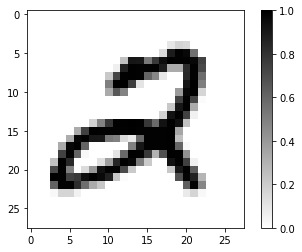

In [8]:
for image, label in test_set.take(1):
  break
image = image.numpy().reshape((28,28))
image = image/255

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

Get the number of training and test data set sizes. This will be used in further chunks of code.

In [9]:
# Total Training and Test data.
train_data_size=metadata.splits['train'].num_examples
test_data_size=metadata.splits['test'].num_examples
print('Training data size : {}'.format(train_data_size))
print('Test data size : {}'.format(test_data_size))

Training data size : 60000
Test data size : 10000


Define a function that normalizes the images. Always the images are pixeled from 0 to 255.
Here we are going to divide the each image pixel by 255 to bring the pixel on to the scale from 0 to 1.

In [10]:
def normalize_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image/255
    return image, label

Normalize the train and test data set.

In [11]:
train_set = train_set.map(normalize_image)
test_set = test_set.map(normalize_image)

Use the cache function to load the data into the memory, initially the data will be loaded from the disk.
<br>But for all the subsequent runs the data will be accessed from the memory or the file that we specify in the cache function.

In [12]:
# Load the images into the memory to train the model faster
train_set = train_set.cache()
test_set = test_set.cache()

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [14]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'])

In [15]:
batch_size=32
train_set = train_set.cache().repeat().shuffle(train_data_size).batch(batch_size)
test_set = test_set.cache().batch(batch_size)
history = model.fit(train_set, epochs=5, steps_per_epoch=math.ceil(train_data_size/batch_size))

Epoch 1/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.1232 - accuracy: 0.9621
Epoch 2/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0395 - accuracy: 0.9874
Epoch 3/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0274 - accuracy: 0.9915
Epoch 4/5
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0205 - accuracy: 0.9937
Epoch 5/5
1875/1875 [==============================] - 80s 43ms/step - loss: 0.0152 - accuracy: 0.9952


Test the model accuracy using the test data set. Model evaluate function test the accuracy of the model using the test date set.

In [16]:
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(test_data_size/32))
print('Test Set Accuracy : ', test_accuracy)
print('Test Set Loss : ', test_loss)

313/313 [==============================] - 6s 20ms/step - loss: 0.0283 - accuracy: 0.9905
Test Set Accuracy :  0.9904999732971191
Test Set Loss :  0.028304599225521088


Define a function to plot the images of the test data set with actual label and predicted labels.
<br> Here we show the label blue in color if the actual and predicted label matches otherwise red in color.

In [17]:
def plot_images(images, cls_true, cls_pred=None):
    n = math.ceil(np.sqrt(len(images))) 
    fig, axes = plt.subplots(n, n +1, figsize=(15, 10))
    fig.subplots_adjust(hspace=1, wspace=1)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        if(i<len(images)):
            ax.imshow(images[i].reshape(28,28), cmap=plt.cm.gray)

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "Actual: {0}".format(cls_true[i])
            else:
                xlabel = "Actual: {0},\n Prediction: {1}".format(cls_true[i], cls_pred[i])
            # Shows the color of the text as red if the predicted label 
            # doesn't match with the actual value.
            if cls_pred[i]!=cls_true[i]:
                label_color = 'red'
            else:
                label_color = 'blue'
            ax.set_xlabel(xlabel, color=label_color)

            # Remove ticks from the plot.
            ax.set_xticks([])
            ax.set_yticks([])
    plt.tight_layout()    
    plt.show()

Since we set the batch size as 32 in the earlier step now every take will give you 32 images at a time.
take(1) gives 32 images where are take(313) will return 32 or less as we will reach the last batch of the test data set.

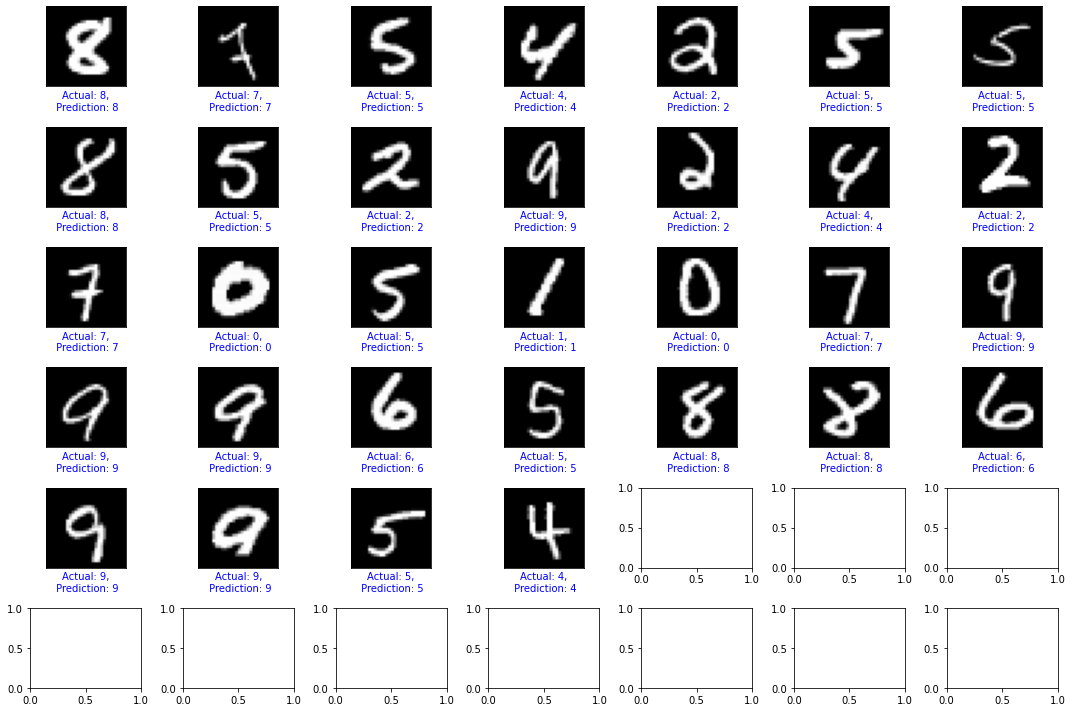

In [18]:
for test_images, test_labels in test_set.take(2):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)
plot_images(test_images, test_labels, np.argmax(predictions,axis=1))

Compared to earlier model, using the convolutions the model accuracy was improved a lot and achieved almost 99%

In the test data set 34th image was predicted correctly compared to earlier model without convolutions.

In the next section we will use the color images in the CNN.